# Lab 7: Classification with Scikit-Learn

The objective of this notebook is to learn about the **Scikit-Learn** library (<a href="https://scikit-learn.org/stable/" >official documentation</a>) and **classification models**.



## A Fast Tutorial
First of all import all the useful libraries to run this tutorial

In [2]:
# Plotting and data manipulation libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Classification models and utilities
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics to assess classification performance
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, f1_score

# Set seed for reproducibility
seed = 1234


### 1. Load 'abalone' dataset 


In [ ]:
# Load dataset and separate features from labels
ds = np.loadtxt('data_lab8/abalone.csv')
X = ds[:, :-1] #da 0 a ultima esclusa
y_truth = ds[:, -1]

# Display class distribution
print("Class distribution:", np.unique(y_truth, return_counts=True)) # return_counts --> If True, also return the number of times each unique item appears


Class distribution: (array([0., 1., 2.]), array([1306, 1342,  416]))


In [4]:
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y_truth.shape)
print("First few samples:\n", X[:5])

Feature matrix shape: (3064, 8)
Label vector shape: (3064,)
First few samples:
 [[ 0.365   0.255   0.08    0.1985  0.0785  0.0345  0.053   5.    ]
 [ 0.465   0.38    0.135   0.579   0.208   0.1095  0.22   14.    ]
 [ 0.365   0.27    0.085   0.1875  0.081   0.042   0.058   6.    ]
 [ 0.575   0.43    0.155   0.7955  0.3485  0.1925  0.22    9.    ]
 [ 0.385   0.29    0.095   0.312   0.143   0.0635  0.086   6.    ]]


#### 2. Create train and test splits
- Use the train_test_split() method
- Random state to make results repeatable

In [5]:
# Separate data into training and test set
# Default test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y_truth, test_size=0.2, random_state=42)


In [6]:
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)

Training features shape: (2451, 8)
Test features shape: (613, 8)
Training labels shape: (2451,)


### 3 Train classifier and make predictions
- Use Decision Tree classifier

In [82]:
# Initialize Decision Tree classifier with limited depth to prevent overfitting
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=5)

# Note: if max_depth=None, the tree grows without limit, increasing the risk of overfitting


In [83]:
# Fit the classifier using only the training data
clf.fit(X_train, y_train)

# !!!! Note: Always fit the model on the training data only — never include test data during training


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [84]:
# Predict labels for the test set using the trained classifier
y_test_pred = clf.predict(X_test)


In [67]:
# Display first 50 true vs. predicted labels for the test set
print("True labels:     ", y_test[:50])
print("Predicted labels:", y_test_pred[:50])


True labels:      [0. 0. 2. 1. 0. 1. 1. 2. 2. 0. 1. 2. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 2.
 0. 1. 1. 1. 0. 1. 2. 1. 0. 0. 1. 1. 2. 1. 1. 0. 2. 2. 1. 1. 1. 0. 1. 1.
 0. 0.]
Predicted labels: [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 0.]


Visualiza Decision Tree

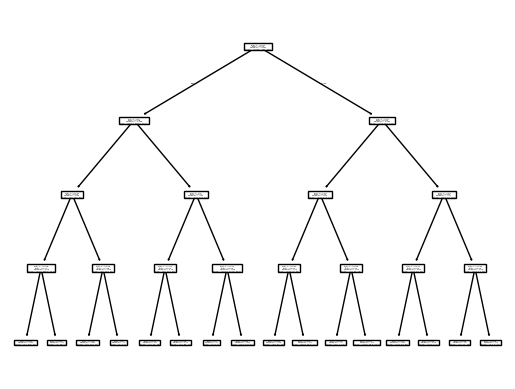

In [86]:
tree.plot_tree(clf) #plotta albero decisionale
plt.show()

### 4 Evaluate the results
- Evaluation using accuracy score

In [85]:
# Compute accuracy
acc = accuracy_score(y_test, y_test_pred)
print(f"Accuracy = {acc:.2f}")

Accuracy = 0.70


- **Accuracy** seems good, but if we look at the scores separately for each class...

In [87]:
# Precision, recall, f1, support: for each class
p, r, f1, support = precision_recall_fscore_support(y_test, y_test_pred) #support e il numero di item

for c in range(p.shape[0]):
    print(f"\nClass {c}:")
    print(f"number of items: {support[c]}")
    print(f"p = {p[c]:.2f}")
    print(f"r = {r[c]:.2f}")
    print(f"f1 = {f1[c]:.2f}")

# Macro average f1
macro_f1 = f1.mean()    
    
# This score is important when you have class imbalancing
print(f"\nF1, macro-average: {macro_f1:2f}")


Class 0:
number of items: 270
p = 0.66
r = 0.87
f1 = 0.75

Class 1:
number of items: 239
p = 0.75
r = 0.80
f1 = 0.77

Class 2:
number of items: 104
p = 0.00
r = 0.00
f1 = 0.00

F1, macro-average: 0.508415


c:\Users\Utente\OneDrive - Politecnico di Torino\LLM_COURSE\From-0-to-LLM\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


- Accuracy was good because of class imbalancing
- The **minority class** (c2) has a very low recall
- Indeed, the **macro-averaged** F1 is quite low.

### Let's verify this with a confusion matrix:

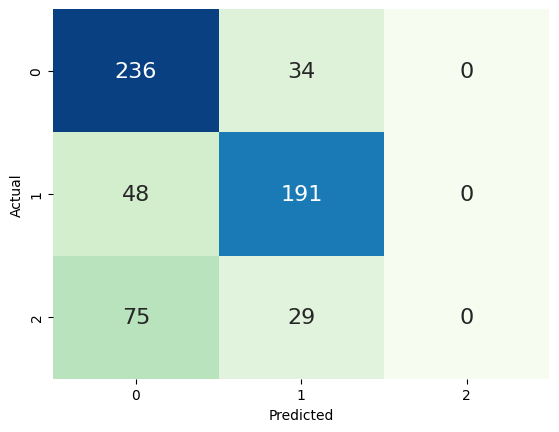

In [ ]:
# Build the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

# Plot the result
label_names = np.arange(p.shape[0])
conf_mat_df = pd.DataFrame(conf_mat, index = label_names, columns = label_names)
conf_mat_df.index.name = 'Actual'
conf_mat_df.columns.name = 'Predicted'
sns.heatmap(conf_mat_df, annot=True, cmap='GnBu', 
            annot_kws={"size": 16}, fmt='g', cbar=False)
plt.show()



**💡 Try changing the hyperparameters (e.g., `max_depth`, `criterion`, `min_samples_split`) to see how they affect model performance.**


# Exercises: Now it's your turn!

Firstly, run the next cell to import useful libraries to complete this lab.

In [89]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
from numpy import newaxis
a = np.array([1, 2, 3])
print(a.shape)
from_row_to_column = a[:, newaxis]
print(from_row_to_column.shape)


(3,)
(3, 1)


## 1. Load dataset

We will use the **Iris** dataset as our first classification problem. *Iris* is a genus of flowering plants that contains several species, including **Iris setosa**, **Iris versicolor**, and **Iris virginica**.

The dataset consists of:
- 150 samples
- 3 labels: species of Iris (*Iris setosa*, *Iris versicolor*, and *Iris virginica*)
- 4 features: *Sepal length*, *Sepal width*, *Petal length*, and *Petal width* in centimeters

Your objective is to build a **multiclass classifier** that can predict the target class (i.e., the species of Iris) given the feature values (i.e., Sepal length, Sepal width, Petal length, and Petal width).

You can find an **exploratory analysis of the dataset** <a href="https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/" >here</a>.

**Scikit-Learn** comes with built-in datasets for the **Iris** classification problem. The next cell loads the iris dataset from Scikit-Learn and stores it in a Pandas DataFrame.

In [90]:
iris = load_iris() # Load Data

df = pd.DataFrame(iris.data, columns = iris.feature_names) # Create a dataframe
df['target'] = iris.target
df['target name'] = df['target'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))

In [91]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [92]:
n_labels = len(set(df['target']))
print(f'Number of labels: {n_labels}')
print(f"labels: {set(df['target name'])}")

Number of labels: 3
labels: {'virginica', 'versicolor', 'sentosa'}


In [93]:
labels = ["sentosa", "versicolor", "virginica"]
label2id = {"sentosa":0, "versicolor":1, "virginica":2}

The following cell describes the dataset by computing the *mean*, *std*, *min*, *max*, and *quantiles* of each column.

In [94]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The following cell counts the number of *null* values in each column.

In [95]:
nan_count = df.isna().sum()
print(nan_count )

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target name          0
dtype: int64


As you can see, there are no *null* values (i.e., **missing values**) in the dataset.

The next cell **counts the number of examples for each class label**.

In [ ]:
df.value_counts("target")

target
0    50
1    50
2    50
Name: count, dtype: int64

As you can see, the labels are **equally represented** in the dataset. Therefore, it is a **balanced** dataset.

## 2. Classification with 2D input features

Now, you will perform the classification task (i.e., predict the species of Iris) using the first **two input features** of the dataset (i.e., *sepal length* and *sepal width*).

#### Exercise 2.1
Select the **first two columns** of the dataset and store them in a variable `X_2d`.

In [105]:
y = df.target
y_names = df["target name"]

#### START CODE HERE (~1 line) ####
X_2d = df.iloc[:,:2]  
#### END CODE HERE ####

In [106]:
X_2d.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


#### Expected output

```      sepal length (cm)	sepal width (cm)```<br>
```0	            5.1          	    3.5```<br>
```1	            4.9	                    3.0```<br>
```2	            4.7	                    3.2```<br>
```3	            4.6	                    3.1```<br>
```4	            5.0	                    3.6```

In [107]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [108]:
y_names

0        sentosa
1        sentosa
2        sentosa
3        sentosa
4        sentosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target name, Length: 150, dtype: object

#### Exercise 2.2
Split the dataset `X_2d` into **training** and **test** sets using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" >train_test_split</a> function provided by the Scikit-Learn library. Store the features of the training set in `X_train_2d`, the features of the test `X_test_2d`, the labels of the training set in `y_train`, and  the labels of the test set in `y_test`. Split the dataset with 80% of samples for training and 20% of samples for testing. **Shuffle** the data and set the **random state** to 42.


In [112]:
#### START CODE HERE (~1 line) ####
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)
#### END CODE HERE ####

In [113]:
print(f"{len(X_train_2d)} training examples")
print(f"{len(X_test_2d)} test examples")

120 training examples
30 test examples


#### Expected output
```120 training examples```<br>
```30 test examples```<br>

The following cell **plots** the examples of the **training set** in the **plane**, with a different color based on the target label.

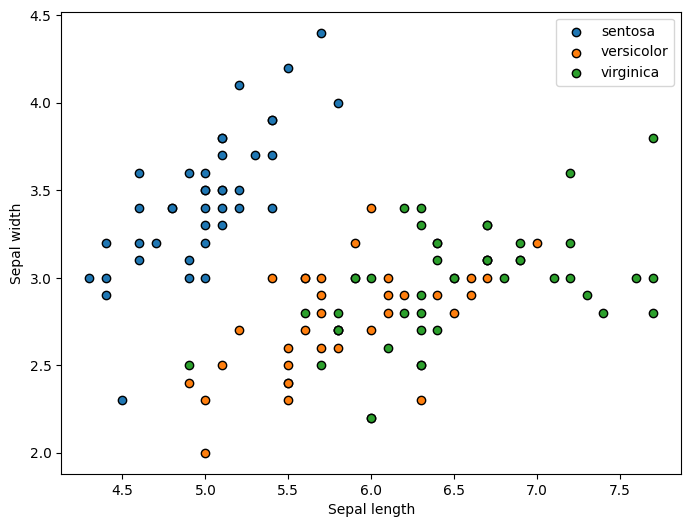

In [114]:
plt.figure(2, figsize=(8, 6))
plt.clf()

for label_id, label in enumerate(labels):
    X_temp = X_train_2d.loc[y_train == label_id]
    plt.scatter(X_temp.iloc[:, 0], X_temp.iloc[:, 1], cmap=plt.cm.Set1, edgecolor="k", label=label)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xticks()
plt.yticks()
plt.legend()

### Train a Support Vector Machine SVM classifier

Here, you will train a **Support Vector Machine SVM** Classifier using the *Scikit-Learn* library. You can learn more about **Support Vector Machines** <a href="https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989" >here</a>. You can find the official Scikit-Learn documentation for **SVM** for classification
<a href="https://scikit-learn.org/stable/modules/svm.html" >here</a>. For this exercise, you can use the **SVC** implementation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC" >here</a>.

#### Exercise 2.3
Create an **SVC object** with the following parameters `gamma=0.1`, `kernel="rbf"`,  `probability=True` in a variable `svm_model`.

Feel free to change the parameters and see how it affects the results.

In [116]:
#### START CODE HERE (~1 line) ####

svm_model = SVC(gamma=0.1, probability=True, kernel='rbf')

#### END CODE HERE ####

#### Exercise 2.4

**Fit** (i.e., train) the `svm_model` with the training data. You should pass the input features and the targets of the training set. Please refer to the documentation for the parameters of the **fit()** method.

In [117]:
#### START CODE HERE (~1 line) ####
svm_model.fit(X_train_2d, y_train)

#### END CODE HERE ####

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


#### Exercise 2.5

**Predict** the labels for the **test dataset** and store them in a variable `y_test_pred_svm`. You should pass the input features of the test data. Please refer to the documentation for the parameters of the **predict()** method.

In [118]:
#### START CODE HERE (~1 line) ####

y_test_pred_svm = svm_model.predict(X_test_2d)

#### END CODE HERE ####

### Confusion Matrix

#### Exercise 2.6

Compute the **confusion matrix** for the predictions on the test set in a variable `cm`. You should pass the **real labels** (i.e., ground-truth labels) and the **predicted labels** by the classifier. Use the `confusion_matrix` function of the Scikit-Learn library. You can find the documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html" >here</a>.

You can learn how to interpret a **confusion matrix** <a href="https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/" >here</a>. 

In [119]:
#### START CODE HERE (~1 line) ####

cm = confusion_matrix(y_test, y_test_pred_svm)

#### END CODE HERE ####
print(cm)

[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


The following cell **plots the confusion matrix**.

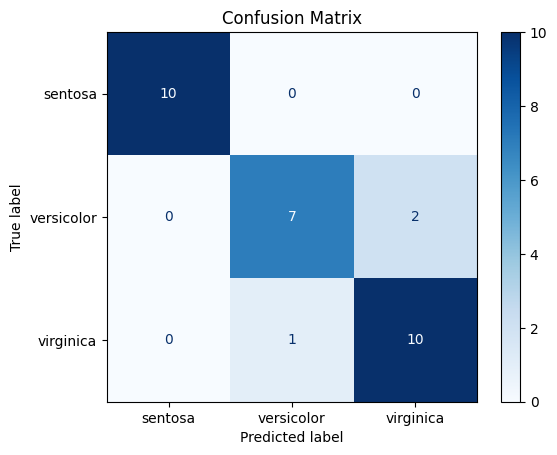

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svm, cmap = plt.cm.Blues)
ax = cmd.ax_
ax.set_title('Confusion Matrix')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

### Accuracy and F1 Score

#### Exercise 2.7

Compute the **accuracy** and the **F1 score** for the predictions on the **test set**, and store the results in the variables `acc_svm` and `f1_svm`, respectively. To compute the **accuracy**, you can use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html" >accuracy_score</a> function of the Scikit-Learn library. Instead, to compute the **F1 score**, you can use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html" >f1_score</a> function of the Scikit-Learn library. For the **F1**, compute the `macro` score (you can specify it in the parameters).

In [122]:
#### START CODE HERE (~2 lines) ####

acc_svm = accuracy_score(y_test, y_test_pred_svm)
f1_svm = f1_score(y_test, y_test_pred_svm, average='micro')

#### END CODE HERE ####

In [123]:
print(f"Accuracy: {acc_svm:.2}")
print(f"F1: {f1_svm:.2}")

Accuracy: 0.9
F1: 0.9


Congratulations. You have trained a very good classifier! It predicts the correct class 9 times out of 10!

### Train a Decision Tree Classifier
Here, you will train a **Decision Tree DT** Classifier using the *Scikit-Learn* library. You can learn more about **Decision Trees** <a href="https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6" >here</a>. You can find the official Scikit-Learn documentation for **Decision Tree**
<a href="https://scikit-learn.org/stable/modules/tree.html" >here</a>. For this exercise, you should use the **DT Classifier**  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier" >here</a>.

#### Exercise 2.6
- Create an `DecisionTreeClassifier` object with the following parameters `max_depth=4` in a variable `dt_model`.
- Fit (i.e., train) the `dt_model` with the training data. You should pass the input features and the targets. Please refer to the documentation.
- Predict the labels for the test dataset and store them in a variable `y_test_pred_dt`. You should pass the input features of the test data.

Feel free to change the parameters and see how it affects the results.


In [124]:
#### START CODE HERE (~3 lines) ####

dt_model = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.05)
dt_model.fit(X_train_2d, y_train)
y_test_pred_dt = dt_model.predict(X_test_2d)

#### END CODE HERE ####

### Train a K-Nearest-Neighbors Classifier

Here, you will train a **K-Nearest-Neighbors** Classifier using the *Scikit-Learn* library. You can learn more about **K-Nearest-Neighbors** <a href="https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4" >here</a>. You can find the official Scikit-Learn documentation for **K-Nearest-Neighbors**
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" >here</a>. For this exercise, you should use the **KNeighborsClassifier**  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" >here</a>.

#### Exercise 2.7

- Create an `KNeighborsClassifier` object with the following parameters `n_neighbors=7` in a variable `knn_model`.
- Fit (i.e., train) the `knn_model` with the training data. You should pass the input features and the targets. Please refer to the documentation.
- Predict the labels for the test dataset and store them in a variable `y_test_pred_knn`. You should pass the input features of the test data.

Feel free to change the parameters and see how it affects the results.

In [125]:
#### START CODE HERE (~3 lines) ####

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_2d, y_train)
y_test_pred_knn = knn_model.predict(X_test_2d)

#### END CODE HERE ####

### Train a Random Forest Classifier

Here, you will train a **Random Forest** Classifier using the *Scikit-Learn* library. You can learn more about **Random Forests** <a href="https://www.ibm.com/topics/random-forest" >here</a>. You can find the official Scikit-Learn documentation for **Random Forest Classifiers**
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#" >here</a>. For this exercise, you should use the **Random Forest Classifier**  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#" >here</a>.

#### Exercise 2.8

- Create an `RandomForestClassifier` object with the following parameters `max_depth=2` in a variable `rf_model`.
- Fit (i.e., train) the `rf_model` with the training data. You should pass the input features and the targets. Please refer to the documentation.
- Predict the labels for the test dataset and store them in a variable `y_test_pred_rf`. You should pass the input features of the test data.

Feel free to change the parameters and see how it affects the results.

In [127]:
#### START CODE HERE (~3 lines) ####

rf_model = RandomForestClassifier(max_depth=2, criterion='gini' ,n_estimators=100, min_impurity_decrease=0.05)
rf_model.fit(X_train_2d, y_train)
y_test_pred_rf = rf_model.predict(X_test_2d)

#### END CODE HERE ####

### Plot Decision Boundaries
The next cell plots the **decision boundaries** for the SVM, the Decision Tree, the KNN, and the Random Forest. To run this cell, ensure that you correctly named the variables `svm_model`, `dt_model`, `knn_model`, and `rf_model`. You can learn more about **decision boundaries** <a href="https://medium.com/analytics-vidhya/decision-boundary-for-classifiers-an-introduction-cc67c6d3da0e" >here</a>.



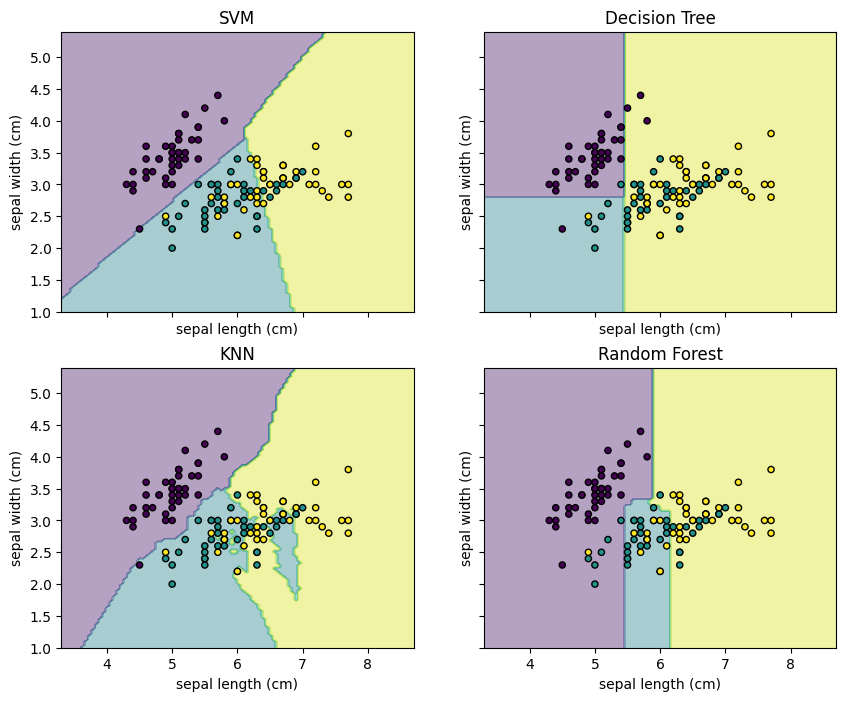

In [ ]:
# Plotting decision regions
from itertools import product

f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(product([0, 1], [0, 1]), #idx = (0,0) | (0,1) | (1,0) | (1,1)
                        [svm_model, dt_model, knn_model, rf_model],
                        ["SVM", "Decision Tree", "KNN", "Random Forest"]):
    DecisionBoundaryDisplay.from_estimator(
        clf, X_train_2d, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### Compare the Classifiers with Quantitative Evaluation Metrics

So far, you have trained 4 different classifiers on the same training data. To assess which performs better, you will calculate **quantitative evaluation** metrics such as **F1**, **Precision**, and **Recall**. Metrics will be calculated either separately for each class or aggregated as a whole.

You can learn more about such quantitative metrics <a href="https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd" >here</a> and <a href="https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9" >here</a>.

#### Exercise 2.9

Compute the **quantitative metrics** for the **SVM** model in a variable `classification_report_svm`, for the **Decision Tree** in a variable `classification_report_dt`, for the **KNN** in a variable `classification_report_knn`, and for the **Random Forest** in a variable `classification_report_rf`. Use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html" >classification_report</a> function of the Scikit-Learn library. It computes all the metrics for each class and overal at once. Remember that the names of your target labels are stored in the variable `labels`.




In [129]:
print(labels)

['sentosa', 'versicolor', 'virginica']


In [133]:
#### START CODE HERE (~4 lines) ####

classification_report_svm = classification_report(y_test, y_test_pred_svm, target_names=labels)
classification_report_dt = classification_report(y_test, y_test_pred_dt, target_names=labels)
classification_report_knn = classification_report(y_test, y_test_pred_knn, target_names=labels)
classification_report_rf = classification_report(y_test, y_test_pred_rf, target_names=labels)

#### END CODE HERE ####

In [134]:
print("SVM")
print(classification_report_svm)

print("\n\nDecision Tree")
print(classification_report_dt)

print("\n\nKNN")
print(classification_report_knn)

print("\n\nRandom Forest")
print(classification_report_rf)

SVM
              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Decision Tree
              precision    recall  f1-score   support

     sentosa       1.00      0.80      0.89        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.50      1.00      0.67        11

    accuracy                           0.63        30
   macro avg       0.50      0.60      0.52        30
weighted avg       0.52      0.63      0.54        30



KNN
              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        10
  versicolor       0.60      0.67      0.63         9
   virginica       0.70      0.64      0.67      

What do you think is the best classifier? Why?

## 3. Classification with all features

Now you will perform the same procedure but using **all the features** in the dataset. Remember that the original dataset contains 4 features but in the previous exercise you used only 2 features.

#### Exercise 3.1

Select **all the feature columns** of the dataset and store them in a variable `X`. The features are stored in the first 4 columns of the DataFrame `df` (i.e., *sepal length (cm)*, *sepal width (cm)*, *petal length (cm)*, and *petal width (cm)*).

In [135]:
y = df.target
y_names = df["target name"]

#### START CODE HERE (~1 line) ####
X = df.iloc[:, :-2]
#### END CODE HERE ####

In [136]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Expected output

```    sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)```<br>
```0	          5.1	            3.5	                     1.4	            0.2```<br>
```1	          4.9	            3.0	                     1.4	            0.2```<br>
```2	          4.7	            3.2	                     1.3	            0.2```<br>
```3	          4.6	            3.1	                     1.5	            0.2```<br>
```4	          5.0	            3.6	                     1.4	            0.2```

This time the input array have 4 features. Therefore you can't visualize it in the plane.

The following cell **splits the dataset into train and test**.

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [138]:
print(f"Number of training examples {len(X_train)}")
print(f"Number of test examples {len(X_test)}")

Number of training examples 120
Number of test examples 30


#### Exercise 3.2

Now **train different classifiers using all input features** `X`. You can also use other classifiers in the *Scikit-Learn* library and different hyperparameters. Can you outperform the best model obtained using only 2 input features?

You can find the list of all implemented classification models <a href="https://scikit-learn.org/stable/supervised_learning.html" >here</a>. 

Remember that the steps are always the same:
1. **Instantiate the model object** you want to use.
2. **Train the model** on the training data using the **fit()** method.
3. **Predict labels for test data** using the **predict()** method.
4. Repeat training and testing **for different models** (and also different hyperparameters of the models).
5. Compute **quantitative evaluation metrics** to identify the best model.

In [ ]:

dt_model = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.05)
dt_model.fit(X_train, y_train)
y_test_pred_dt = dt_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
y_test_pred_knn = knn_model.predict(X_test)

rf_model = RandomForestClassifier(max_depth=4, criterion='gini', n_estimators=100,  min_impurity_decrease=0.05)
rf_model.fit(X_train, y_train)
y_test_pred_rf = rf_model.predict(X_test)

svm_model = SVC(gamma  = 0.1, C =1.0, kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_test_pred_svm = svm_model.predict(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_test_pred_nb = nb_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_test_pred_gb = gb_model.predict(X_test)

# Ridge Classifier
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Multi-layer Perceptron (Neural Network)
mlp_model = MLPClassifier(max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_test_pred_mlp = mlp_model.predict(X_test)

#Logistic
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_test_pred_log = logistic_model.predict(X_test)


classification_report_svm = classification_report(y_test, y_test_pred_svm, target_names=labels)
classification_report_dt = classification_report(y_test, y_test_pred_dt, target_names=labels)
classification_report_knn = classification_report(y_test, y_test_pred_knn, target_names=labels)
classification_report_rf = classification_report(y_test, y_test_pred_rf, target_names=labels)
classification_report_log = classification_report(y_test, y_test_pred_log, target_names=labels)
classification_report_nb = classification_report(y_test, y_test_pred_nb, target_names=labels)
classification_report_gb = classification_report(y_test, y_test_pred_gb, target_names=labels)
classification_report_ridge = classification_report(y_test, y_test_pred_ridge, target_names=labels)
classification_report_mlp = classification_report(y_test, y_test_pred_mlp, target_names=labels)

print("SVM")
print(classification_report_svm)

print("\n\nDecision Tree")
print(classification_report_dt)

print("\n\nKNN")
print(classification_report_knn)

print("\n\nRandom Forest")
print(classification_report_rf)

print("\n\nLOG")
print(classification_report_log)

print("\n\nNAIVE BAYES")
print(classification_report_nb)

print("\n\nRIDGE")
print(classification_report_ridge)

print("\n\nNN")
print(classification_report_mlp)

SVM
              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        11
  versicolor       1.00      0.88      0.93         8
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



Decision Tree
              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        11
  versicolor       0.70      0.88      0.78         8
   virginica       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.86      0.87      0.86        30
weighted avg       0.88      0.87      0.87        30



KNN
              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00      